In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys

sys.path.append("../")

from vae_interp.vae import VAE
from vae_interp.sae import SAE
from vae_interp.controls import FeaturesControls
from vae_interp.dataset import load_nouns_dataset, NpyDataset
import matplotlib.pyplot as plt

/home/ubuntu/.cache/pypoetry/virtualenvs/swiggle-H3gdtMpT-py3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
vae = VAE.load_from_dir("../weights/vae")
# sae = SAE.load_from_checkpoint("../weights/sae/config.json",
#                                "../weights/sae/sae.pth")
path = "../checkpoints/sae_awesome/lr=5.0e-03_l1=1.0e-02"
sae = SAE.load_from_checkpoint(f"{path}/config.json",
                               f"{path}/sae.pth")

In [5]:
nouns_dataset = load_nouns_dataset(image_size=64, normalize=True)

In [6]:
features_controls = FeaturesControls(
    sae=sae, vae=vae, latent_shape=(4, 4, 4)
)

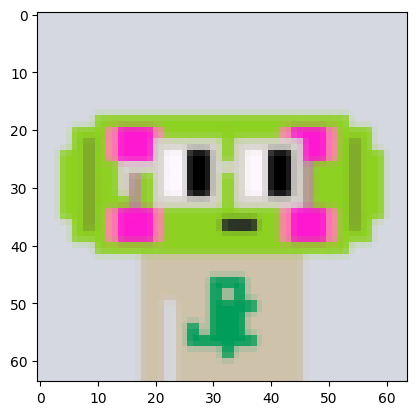

In [74]:
idx = 5967
image = nouns_dataset[idx]
original_image = nouns_dataset.dataset[idx]["image"]

plt.imshow((image.permute(1, 2, 0) + 1) * 0.5)

In [75]:
features = features_controls.get_features(image)
features

{50: 0.2797830104827881,
 56: 0.2908778786659241,
 207: 0.09994141012430191,
 242: 0.5531796813011169,
 244: 0.3355729281902313,
 278: 0.38778823614120483,
 279: 0.1184970960021019,
 281: 0.5400993227958679,
 322: 0.29888564348220825,
 360: 0.6225854754447937,
 428: 4.265193462371826,
 547: 0.191888228058815,
 631: 0.16265399754047394,
 645: 1.2437529563903809,
 665: 0.003782779909670353,
 693: 0.13908904790878296,
 721: 1.114631175994873,
 758: 0.10980702191591263,
 825: 0.16458061337471008,
 838: 0.8270633220672607,
 902: 0.19805841147899628,
 1001: 0.04262734204530716}

In [76]:
# sort the feature by their activation value and print a list -> features is a dict mapping featrure id to activation
sorted_features = sorted(features.items(), key=lambda x: x[1], reverse=True)
sorted_features

[(428, 4.265193462371826),
 (645, 1.2437529563903809),
 (721, 1.114631175994873),
 (838, 0.8270633220672607),
 (360, 0.6225854754447937),
 (242, 0.5531796813011169),
 (281, 0.5400993227958679),
 (278, 0.38778823614120483),
 (244, 0.3355729281902313),
 (322, 0.29888564348220825),
 (56, 0.2908778786659241),
 (50, 0.2797830104827881),
 (902, 0.19805841147899628),
 (547, 0.191888228058815),
 (825, 0.16458061337471008),
 (631, 0.16265399754047394),
 (693, 0.13908904790878296),
 (279, 0.1184970960021019),
 (758, 0.10980702191591263),
 (207, 0.09994141012430191),
 (1001, 0.04262734204530716),
 (665, 0.003782779909670353)]

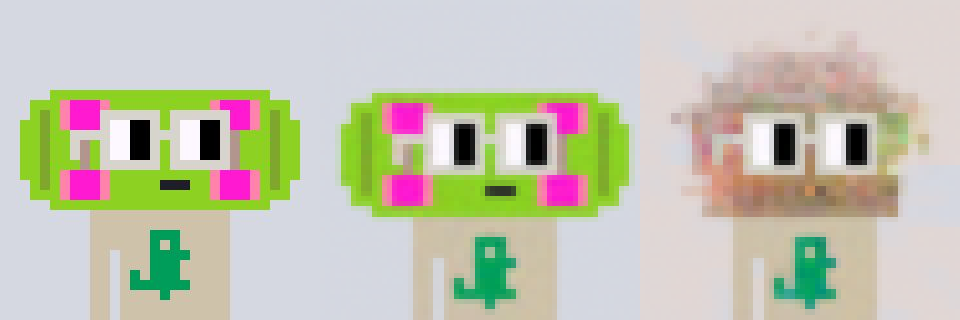

In [121]:
new_features = {**features}
new_features[428] = 0
# new_features[645] = 0
# new_features[721] = 0
# new_features[838] = 0
# new_features[360] = 0
# new_features[242] = 0
# new_features[281] = 0
# new_features[278] = 0
# new_features[244] = 0
# new_features[322] = 0
# new_features[56] = 0
# new_features[50] = 0
# new_features[902] = 0
# new_features[547] = 0
# new_features[825] = 0
new_features[631] = 0
new_features[693] = 0
new_features[279] = 0
new_features[758] = 0
new_features[207] = 0
new_features[1001] = 0
new_features[665] = 0

# new_features[197] = 0
# new_features[1019] = 0

import torch
modified_image = features_controls.modify_features(image, new_features)
# modified_image = (modified_image - modified_image.min()) / (modified_image.max() - modified_image.min())
modified_image = torch.clamp((modified_image + 1) * 0.5, 0, 1)  
# modified_image = modified_image.permute(1, 2, 0)

from vae_interp.utils import make_image_grid
from torchvision.transforms import ToPILImage
from PIL import Image

sae_recon = features_controls.modify_features(image, features)
sae_recon = torch.clamp((sae_recon + 1) * 0.5, 0, 1)
sae_recon = ToPILImage()(sae_recon).resize((330, 330), 0)

modified_image = ToPILImage()(modified_image).resize((330, 330), 0)

make_image_grid([
    original_image,
    sae_recon,
    modified_image
], rows=1, cols=3)